In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [2]:
df_meme = pd.read_csv("../data/meme/ori_meme/annotated_memes_total.csv")
df_tweet = pd.read_csv("../data/tweet/text-tweets/covid-tweets-20-22-sample-with-toxicity.csv")

In [3]:
# add a column of label to df_tweet
df_tweet['label'] = df_tweet['toxicity'].apply(lambda x: 1 if x > 0.5 else 0)
# add columns to indicate the year
df_tweet['year'] = df_tweet['created_at'].apply(lambda x: x.split('-')[0])
df_meme['year'] = df_meme['created_at'].apply(lambda x: x.split('-')[0])

In [4]:
# print a table to show the distribution of the dataset
table_fields = ['Year', 'Hateful/Toxic', 'Non-Hateful/Non-Toxic']
t = PrettyTable(table_fields)
t.padding_width=1
t.title = "Meme"
t.add_row(['Overall', len(df_meme[df_meme['label']==1]), len(df_meme[df_meme['label']==0])])
t.add_row(['2020', len(df_meme[(df_meme['label']==1) & (df_meme['year']=='2020')]), len(df_meme[(df_meme['label']==0) & (df_meme['year']=='2020')])])
t.add_row(['2021', len(df_meme[(df_meme['label']==1) & (df_meme['year']=='2021')]), len(df_meme[(df_meme['label']==0) & (df_meme['year']=='2021')])])
t.add_row(['2022', len(df_meme[(df_meme['label']==1) & (df_meme['year']=='2022')]), len(df_meme[(df_meme['label']==0) & (df_meme['year']=='2022')])])
print(t)
t1 = PrettyTable(table_fields)
t1.padding_width=1
t1.title = "Text-only"
t1.add_row(['Overall', len(df_tweet[df_tweet['label']==1]), len(df_tweet[df_tweet['label']==0])])
t1.add_row(['2020', len(df_tweet[(df_tweet['label']==1) & (df_tweet['year']=='2020')]), len(df_tweet[(df_tweet['label']==0) & (df_tweet['year']=='2020')])])
t1.add_row(['2021', len(df_tweet[(df_tweet['label']==1) & (df_tweet['year']=='2021')]), len(df_tweet[(df_tweet['label']==0) & (df_tweet['year']=='2021')])])
t1.add_row(['2022', len(df_tweet[(df_tweet['label']==1) & (df_tweet['year']=='2022')]), len(df_tweet[(df_tweet['label']==0) & (df_tweet['year']=='2022')])])
print(t1)


+-------------------------------------------------+
|                       Meme                      |
+---------+---------------+-----------------------+
|   Year  | Hateful/Toxic | Non-Hateful/Non-Toxic |
+---------+---------------+-----------------------+
| Overall |      4001     |          4384         |
|   2020  |      2987     |          3273         |
|   2021  |      826      |          950          |
|   2022  |      188      |          161          |
+---------+---------------+-----------------------+
+-------------------------------------------------+
|                    Text-only                    |
+---------+---------------+-----------------------+
|   Year  | Hateful/Toxic | Non-Hateful/Non-Toxic |
+---------+---------------+-----------------------+
| Overall |      5854     |         43435         |
|   2020  |      2889     |         22880         |
|   2021  |      1991     |         14106         |
|   2022  |      974      |          6449         |
+---------+-

In [46]:
# create a column to save both year and month
df_meme["year_month"] = df_meme["created_at"].apply(lambda x: str(x)[:7])


### statistics

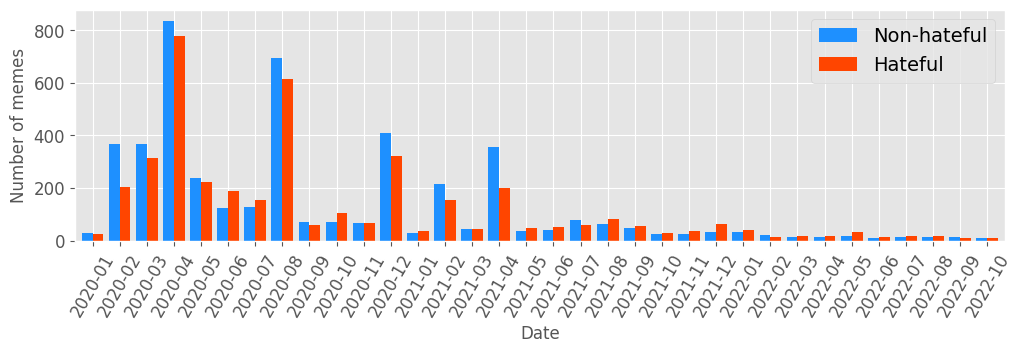

In [47]:
# plot the distribution of memes over time (year and month)
plt.style.use('ggplot')
# red bar for label 1, blue bar for label 0
df_meme.groupby("year_month")["label"].value_counts().unstack().plot(kind="bar", figsize=(12, 3), color=["dodgerblue", "orangered"], width=0.8, stacked=False, fontsize=12, rot=60)
# plt.title("Distribution of memes over time")
# change the lengend size
plt.legend(["Non-hateful", "Hateful"], fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of memes")
plt.savefig("meme_distribution.pdf", bbox_inches="tight")
plt.show()